# Electrolysis

Electrolysis follows the reaction:

$H_2O \rightarrow H_2 + \frac{1}{2} O_2$.

Process enthaly change $\Delta H$ = 285.84 kJ/mol

Gibbs energy of the reaction at ambient temperature: $\Delta G$ = 237.2 kJ/mol

http://www.helmeth.eu/index.php/technologies/high-temperature-electrolysis-cell-soec

### Energy balance

In [2]:
mh2 = 1  # hydrogen mass [kg]
Mh = 1.008  # hydrogen molar mass [g/mol]
nomolh2 = mh2*1e3/2/Mh  # number of h2 mols
print("H2 mols in 1kg of H2: ", nomolh2)

dH = 285.84  # [kJ/mol] energy required
dG = 237.2  # [kJ/mol] electrical energy required
E = dH * nomolh2  # E[kJ] to produce 1kg of H2
# print(108e3/nomolh2)
E = E/3600  # E [kWh]
print("Energy required to produce 1kg of H2: ", E, "kWh")

print("Electricity required to produce 1kg of H2: ", dG*nomolh2/3600, "kWh")

H2 mols in 1kg of H2:  496.031746031746
Energy required to produce 1kg of H2:  39.384920634920626 kWh
Electricity required to produce 1kg of H2:  32.682980599647266 kWh


### Mass balance

In [6]:
mw = 1  # mass of water [kg]
Mw = 18.0153  # water molar mass [g/mol]
nomolw = mw*1e3/Mw  # Number of mols of H_2O
nomolh2 = nomolw  # Number of mols of H_2 produced
mh2 = nomolh2*2*Mh/1000  # hydrogen (H_2) mass produced
print("Mass of h2 produced with 1 kg of water: ", mh2, "kg")
mw = 1/mh2  # mass of water required to produce 1 kg of H_2
print("Mass of water required to produce 1kg of H2: ", mw, "kg")
nomolw*mw

Mass of h2 produced with 1 kg of water:  0.11190488085127642 kg
Mass of water required to produce 1kg of H2:  8.936160714285714 kg


496.031746031746

1 Nm$^3$ is 1 cubic meter at Normal temperature and pressure conditions (NTP).

NTP: T = 293.15 K and P = 1 atm

1 Nm$^3$ = 0.084 kg (NIST)

### Some real numbers

Next cells present data provided by some manufacturers. We only considered manufacturers that reported global energy consumption of the hydrogen production system.

<cite data-cite="6356110/SXGTBWZC"></cite>

https://ieeexplore.ieee.org/abstract/document/5898382

In [12]:
# AccaGen: alkaline(bipolar) electrolizer, efficiency = 53 - 73%
semin = 4.87  # specific energy [kWh/Nm^3]
semax = 6.7

seave = (semin+semax)/2
seave1 = seave/0.084  # kWh/kg
print("Required electrical energy: ", seave1, "kWh/H2kg")
print("40 kWh/efficiency: ", 40/0.73, "-", 40/0.53,"kWh/H2kg")

rated_production = 100 # Nm3/h
rated_production *= 0.084
rated_production #kg/h

Required electrical energy:  68.86904761904762 kWh/H2kg
40 kWh/efficiency:  54.794520547945204 - 75.47169811320754 kWh/H2kg


8.4

In [13]:
# H2 Logic: alkaline(bipolar) electrolizer, efficiency = 65 - 71%
semin = 5  # specific energy [kWh/Nm^3]
semax = 5.45

seave = (semin+semax)/2
seave2 = seave/0.084  # kWh/kg
print("Required electrical energy: ", seave2, "kWh/H2kg")
print("40 kWh/efficiency: ", 40/0.71, "-", 40/0.65,"kWh/H2kg")

rated_production = 42.6 # Nm3/h
rated_production *= 0.084
rated_production #kg/h

Required electrical energy:  62.20238095238094 kWh/H2kg
40 kWh/efficiency:  56.33802816901409 - 61.53846153846153 kWh/H2kg


3.5784000000000002

In [14]:
# Hydrogenics: PEM(bipolar) electrolizer, efficiency = 49.2%
seave = 7.2 # specific energy [kWh/Nm^3]

seave3 = seave/0.084  # kWh/kg
print("Required electrical energy: ", seave3, "kWh/H2kg")
print("40 kWh/efficiency: ", 40/0.492,"kWh/H2kg")

rated_production = 1 # Nm3/h
rated_production *= 0.084
rated_production #kg/h

Required electrical energy:  85.71428571428571 kWh/H2kg
40 kWh/efficiency:  81.30081300813008 kWh/H2kg


0.084

We can get an average for all these specific energies and take it as the specific energy for electrolysis ??

In [15]:
see=(seave1+seave2+seave3)/3
print("specific energy for electrolysis: ", see, "kWh/kg H2")
# see = see - 40.8/3600*nomolh2  # 40.8 kj/mol latent heat of water
print("this corresponds to an efficiency of: ", 40/see*100,"%")

specific energy for electrolysis:  72.26190476190476 kWh/kg H2
this corresponds to an efficiency of:  55.35420098846787 %


I thought maybe that those numbers were a little bit old because the report they came out of is from 2011. So, I looked for more recent numbers and the following report lists the system-level efficiency to be up to 67%.

https://www.energy.gov/sites/prod/files/2017/11/f46/HPTT%20Roadmap%20FY17%20Final_Nov%202017.pdf

This numbers are consistent with the values found here:
https://www.researchgate.net/publication/330701158_Hydrogen_Production_Technologies_Overview

E = 53.4 - 70.1 kWh/kg of H2 at 1 atm and 25C (approximately normal conditions).

In [15]:
see = 40/0.67  #Energy required 40kWh
print(see, "kWh")

see = 33/0.67  #Electrical energy required 33kWh
print(see, "kWh")

59.70149253731343 kWh
49.253731343283576 kWh


In [16]:
Pth = 10 # MW
ef = 1/3
Pe = ef*Pth

see = 60  # kWh/kg oh H2

prod_rate = Pe/E*1e3
print("Production rate of a ", Pth, "MWth reactor: ", prod_rate, "kg/h")

Production rate of a  10 MWth reactor:  84.6347607052897 kg/h


Text(0.5,0,'Power [MW$_{th}$]')

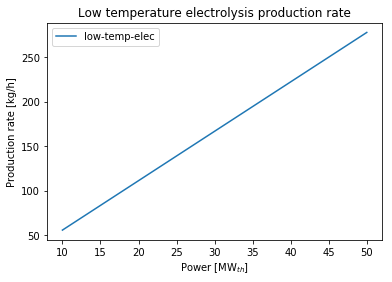

In [17]:
import numpy as np
import matplotlib.pyplot as plt

prate = []
power = [10, 20, 30, 40, 50]  #thermal
for p in power:
    prate.append(ef*p*1e3/see)

plt.plot(power, prate, label='low-temp-elec')
plt.legend(loc="upper left")
plt.title('Low temperature electrolysis production rate')
plt.ylabel('Production rate [kg/h]')
plt.xlabel('Power [MW$_{th}$]')

# High Temperature Electrolysis

From <cite data-cite="6356110/SXGTBWZC"></cite>, Solid Oxide Electrolyzers produced 17.6 Nl/h of hydrogen at 1000C and 39.3 W of applied power.

In [18]:
E = 39.3e-3  # Energy [kWh]
M = 17.6e-3*0.084  # Mass of H2 [kg]
se1000 = E/M
print(se1000*3600/1e3, "MJ/kg")
print("Specific energy: ", se1000, "kWh/H2kg")  # Specific energy [kWh/kg]

rated_production = 600  # N dm3/h, 1l = 1dm3
rated_production *= (1e-3*0.084)
rated_production  #kg/h

95.69805194805194 MJ/kg
Specific energy:  26.582792207792206 kWh/H2kg


0.05040000000000001

I get 95.7 MJ/kg from those numbers. According to wikipedia that number should be 108 MJ/kg, but I could not find the file they cite as the reference.

https://en.wikipedia.org/wiki/Hydrogen_economy#High-temperature_electrolysis

From https://inldigitallibrary.inl.gov/sites/sti/sti/4480292.pdf, Solid Oxide Electrolyzers produced 17.6 Nm$^3$/h of hydrogen at 800C and 18 kW of applied power.

In [19]:
E = 18  # kWh
M = 5.7*0.084
se800 = E/M
print("Specific energy: ", se800, "kWh/H2kg")  # Specific energy [kWh/kg]

rated_production = M # N m3/h
rated_production  #kg/h

Specific energy:  37.59398496240601 kWh/H2kg


0.47880000000000006

Temperature: 700-750C
Operating pressure: 5 bar

Electricity consumption: 36.8 kWh/kg
Thermal consumption: 5.9 kWh/kg

https://www.hydrogen.energy.gov/pdfs/review19/ta019_ghezel-ayagh_2019_o.pdf

For now we do not count with more accure information for temperatures in the range 600-1000C. We are going to use a linear interpolation between normal electrolysis at room temperature and HTE at 800C, another interpolation between normal electrolysis at room temperature, and then average boths curves.

Text(0.5,0,'Temperature [$^\\circ$C]')

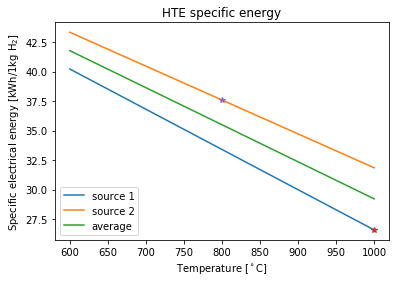

In [20]:
import numpy as np
import matplotlib.pyplot as plt
seht1 = []
seht2 = []
temp = [600, 700, 800, 900, 1000]
for T in temp:
    seht1.append((se1000-see)/(1000-20)*(T-20)+see)
    seht2.append((se800-see)/(800-20)*(T-20)+see)
sehta = np.array(seht1)/2 + np.array(seht2)/2

plt.plot(temp, seht1, label='source 1')
plt.plot(temp, seht2, label='source 2')
plt.plot(temp, sehta, label='average')
plt.plot(temp[temp.index(1000)], seht1[temp.index(1000)], marker='*')
plt.plot(temp[temp.index(800)], seht2[temp.index(800)], marker='*')
plt.legend(loc="lower left")
plt.title('HTE specific energy')
plt.ylabel('Specific electrical energy [kWh/1kg H$_2$]')
plt.xlabel('Temperature [$^\circ$C]')


Previously, we calculated the electric energy required to produce H$_2$ given we count with the high temperature steam. Some reactors can supply such high temperatures, but some cannot. So the next step is to calculate how much natural gas is required to boost the temperature of the steam to usable values.

We assume that the temperature of the water feeding the natural gas system is equal to the outlet temperature of the reactor.

### Boosting steam temperature:

Calculation dependes on boiler efficiency, feedwater temperature, and steam pressure.

HTE Pressures:
* P = 3.5 MPa <cite data-cite="6356110/M4HF3HHP"></cite> 
https://inldigitallibrary.inl.gov/sites/sti/sti/4235643.pdf



Text(0.5,0,'Temperature [$^\\circ$C]')

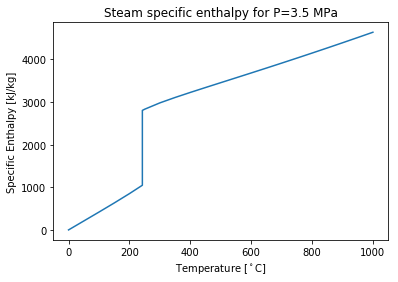

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# to produce 1 kg of H2 we need 'mw' kg of steam
df1 = pd.read_csv("steam-properties.csv")
plt.plot(df1['Temperature(C)'], df1['Enthalpy(kJ/kg)'])
plt.title('Steam specific enthalpy for P=3.5 MPa')
plt.ylabel('Specific Enthalpy [kJ/kg]')
plt.xlabel('Temperature [$^\circ$C]')


In [22]:
def steam(inT, outT, mh):
    hin = df1[df1['Temperature(C)'] == inT]['Enthalpy(kJ/kg)'].values.tolist()[0]
    hou = df1[df1['Temperature(C)'] == outT]['Enthalpy(kJ/kg)'].values.tolist()[0]
    e = hou-hin  # kJ/kg of steam
    e = e/3600  # kWh/kg of steam
    E = e*mw  # kWh/kg of H2
    E = E/0.90  # kWh/kg of H2 Boiler efficiency
    E = E*mh  # kWh

    return E

In [24]:
inT = 50    # not sure about this Temp
outT1 = 500  # reactor out temp*0.9
outT2 = 700  # choice
mh = 1

E0 = steam(inT, outT1, mh)  # Energy required to increase the steam temperature
E1 = steam(outT1, outT2, mh)  # Energy required to increase the steam temperature
E2 = mh * sehta[temp.index(outT2)]  # Energy required to perform the HTE

print("Total energy (heat + electricity):")
print(E1, '+', E2, '=', E1+E2, 'kW')

Total energy (heat + electricity):
1.2620947971781313 + 38.639550344034774 = 39.9016451412129 kW


Text(0.5,0,'Temperature [$^\\circ$C]')

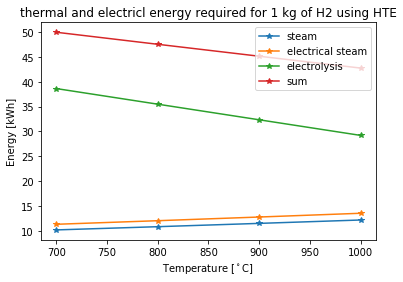

In [26]:
mh = 1
ef = 1/3 # Efficiency of converting thermal to electrical energy
eB = 0.9 # Efficiency of converting electrical to thermal energy
ES = []
EE = []
out_temperature = [700, 800, 900, 1000]
for ouT in out_temperature:
    ES.append(steam(inT, outT1, mh)+steam(outT1, ouT, mh))  # Energy to boost steams temperature
    EE.append(mh * sehta[temp.index(ouT)])  # Energy to produce the electrolysis (HTE)

plt.plot(out_temperature, ES, label='steam', marker='*')
plt.plot(out_temperature, 1./eB*np.array(ES), label='electrical steam', marker='*')
plt.plot(out_temperature, EE, label='electrolysis', marker='*')
plt.plot(out_temperature, 1./eB*np.array(ES) + np.array(EE), label='sum', marker='*')
plt.legend(loc="upper right")
plt.title('thermal and electricl energy required for {0} kg of H2 using HTE'.format(mh))
plt.ylabel('Energy [kWh]')
plt.xlabel('Temperature [$^\circ$C]')

This plot makes sense, the summation of the energy required to carry out the electrolysis and the the energy to increase the steam temperature should be almost constant according to the following graph.

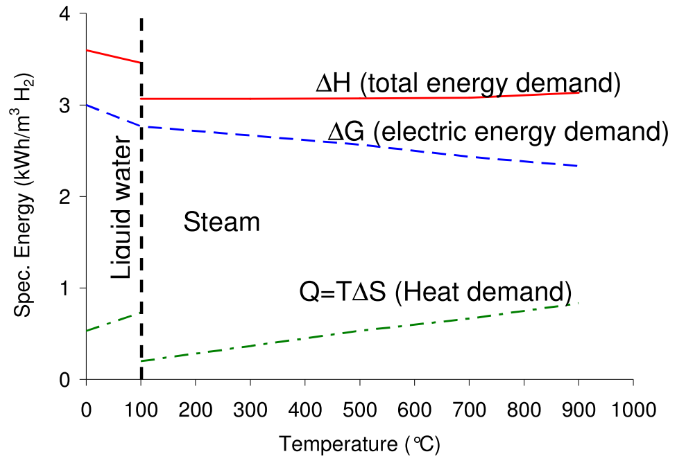

In [39]:
from IPython.display import Image
Image(filename='figures/electrolysis2.png')

I need to add the information of the outlet temperature of the reactors, and see where I am in each curve.

### Electrical Boiler

Need info about this. I supposed a 90% efficiency. I should also look for production rates.

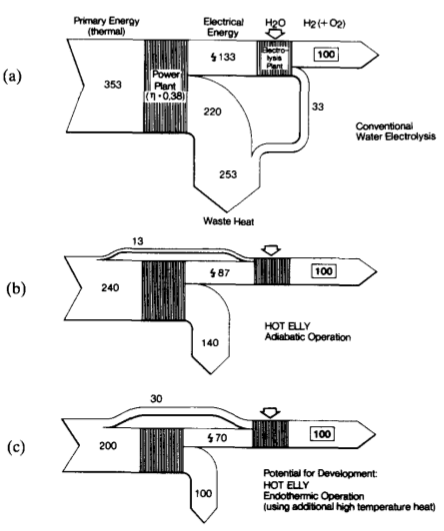

In [24]:
from IPython.display import Image
Image(filename='figures/electrolysis3.png')

In [34]:
P1=1./ef*np.array(EE)
P2=1./ef/0.9*np.array(ES)
PT=P1+P2
print(PT)
p1 = P1/PT
print(p1)
p2 = P2/PT
print(p2)

[115.2252657  111.67621468 108.18048643 104.73900031]
[0.94525753 0.92414709 0.90120642 0.87627959]
[0.05474247 0.07585291 0.09879358 0.12372041]


Text(0.5,0,'Temperature [$^\\circ$C]')

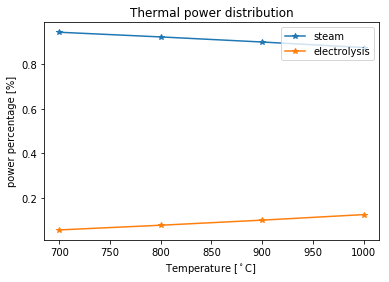

In [36]:
plt.plot(out_temperature, p1, label='steam', marker='*')
plt.plot(out_temperature, p2, label='electrolysis', marker='*')

plt.legend(loc="upper right")
plt.title('Thermal power distribution')
plt.ylabel('power percentage [%]')
plt.xlabel('Temperature [$^\circ$C]')

## Secondary loop temperatures:

#### PWR:

Tin = 227C, P = 6.9 MPa
Tout = 285C (Tout = Tsat)

https://ocw.mit.edu/courses/nuclear-engineering/22-06-engineering-of-nuclear-systems-fall-2010/lectures-and-readings/MIT22_06F10_lec06a.pdf

#### Xe-100:

$\dot{m}$ = 78.9 kg/s
Tin = 205C, P = 19.3 MPa, hin = 883 kJ/kg
Tout = 565C, P = 16.8 MPa, hout = 3474 kJ/kg

https://adamswebsearch2.nrc.gov/webSearch2/main.jsp?AccessionNumber=ML18253A109

We can go arround this. I consider that the reactor's primary loop gives its energy to a secondary loop that gives its energy to a 3rd loop that produces steam from room temp water. This process would be more efficient if the water was at higher temperatures than rooom T, but the a big portion of the steam that goes into the SOEC is lost as it becomes H2 and O2. There is a portion of it that is not converted though, then mixing such steam with room temp water will boost the water temperature. I need more accurate info about this. But I will start with a guess of 40 C.

### Cycle efficiencies:

HTGR-Bryton: 46.6%

https://www.nrel.gov/docs/gen/fy02/32405d.pdf




### Econommics:

SI-H2 Cycle with HTGR:

https://www.nrel.gov/docs/gen/fy02/32405d.pdf